In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


In [21]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
data  = pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')

In [23]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [25]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


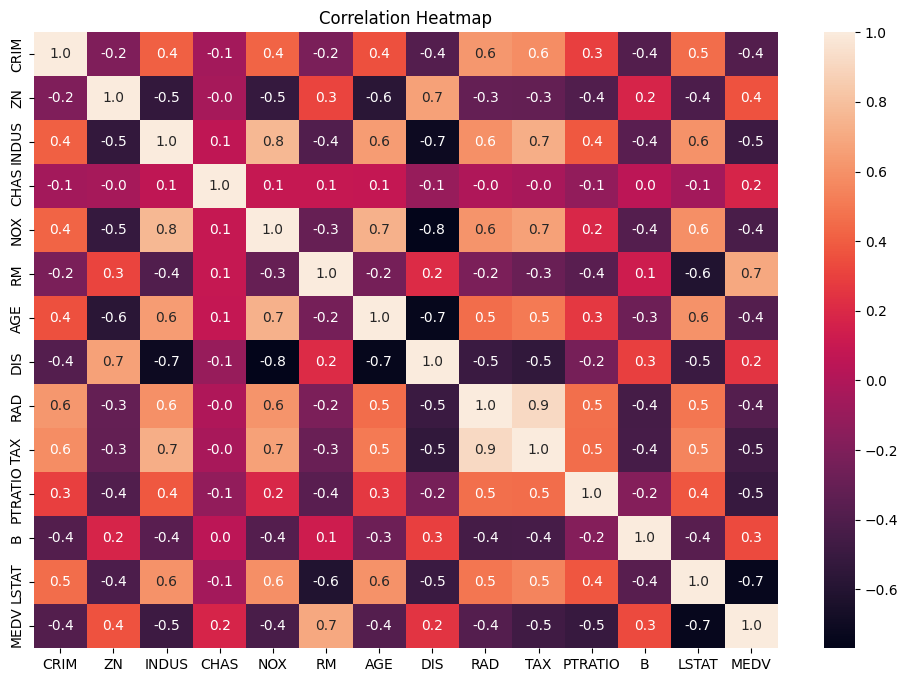

In [26]:
# Heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

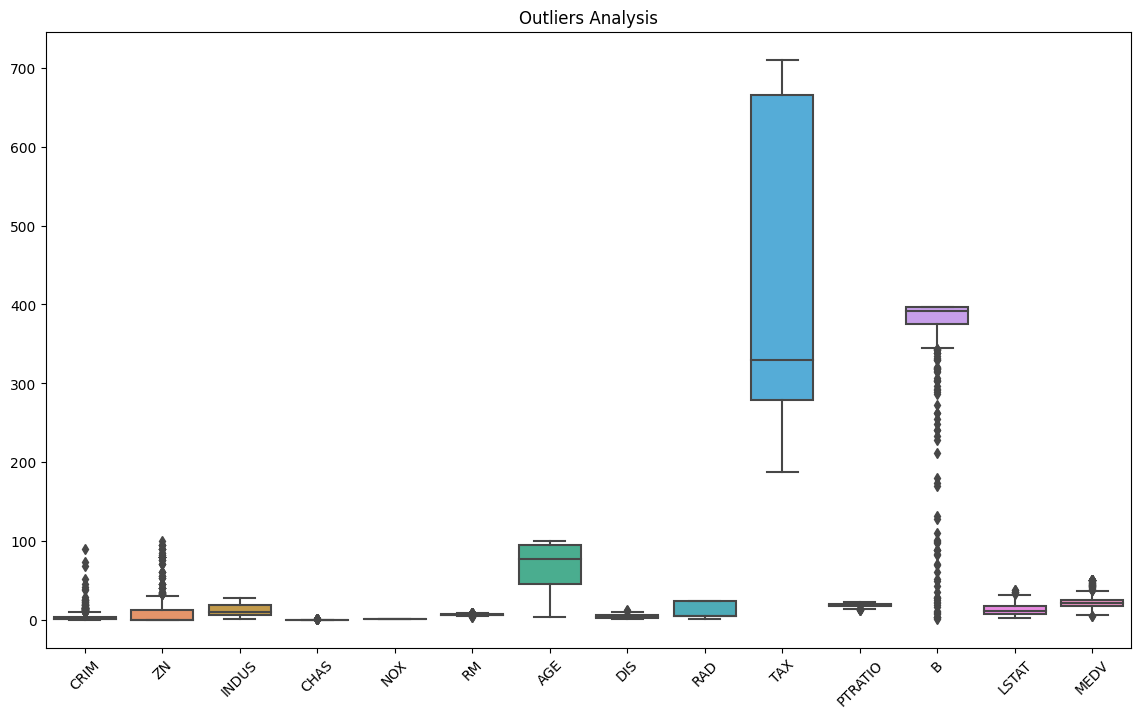

In [27]:
# Outliers Analysis
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, orient="v")
plt.title("Outliers Analysis")
plt.xticks(rotation=45)
plt.show()

<Axes: >

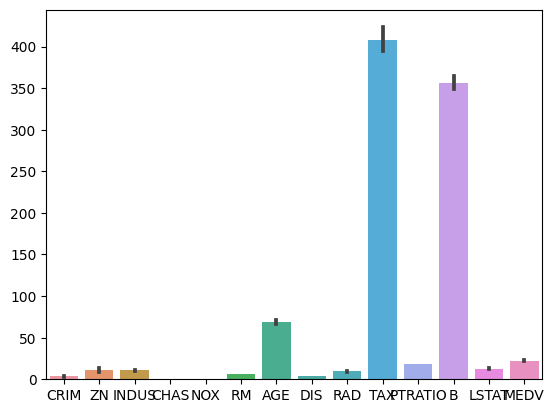

In [28]:
sns.barplot(data)

In [29]:
X = data.drop('MEDV',axis = 1)
y = data['MEDV']
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
results = {}

In [31]:
# Function to add results to the dictionary
def model(model, x_train, y_train, x_test, y_test, model_name):
    mod = model
    mod_fit = mod.fit(x_train, y_train)
    y_pred = mod_fit.predict(x_test)
    print("accuracy : ")
    print(mod.score(x_train, y_train))
    print('Model results')
    print('MAE:', mean_absolute_error(y_pred, y_test).round(2))
    print('MSE:', mean_squared_error(y_pred, y_test).round(2))
    print('RMSE:', np.sqrt(mean_absolute_error(y_pred, y_test)).round(2))
    print('R2_score:', r2_score(y_pred, y_test).round(2))
    print('-'*20)
    
    results[model_name] = {
        'MAE': mean_absolute_error(y_pred, y_test).round(2),
        'MSE': mean_squared_error(y_pred, y_test).round(2),
        'RMSE': np.sqrt(mean_absolute_error(y_pred, y_test)).round(2),
        'R2_score': r2_score(y_pred, y_test).round(2)
    }
    
    df_model = pd.DataFrame({
    'Test': y_test,
    'Predict': y_pred
    })
    print(df_model.head(10))
    
    plt.figure(figsize = (14, 8))
    sns.regplot(x = y_test, y = y_pred)

accuracy : 
0.7442565361338509
Model results
MAE: 3.59
MSE: 30.01
RMSE: 1.89
R2_score: 0.59
--------------------
     Test    Predict
355  20.6  16.812848
203  48.5  41.897511
16   23.1  20.267915
416   7.5  13.371166
347  23.1  25.368439
501  22.4  23.314335
46   20.0  20.638619
75   21.4  23.908525
31   14.5  18.158499
449  13.0  17.021675


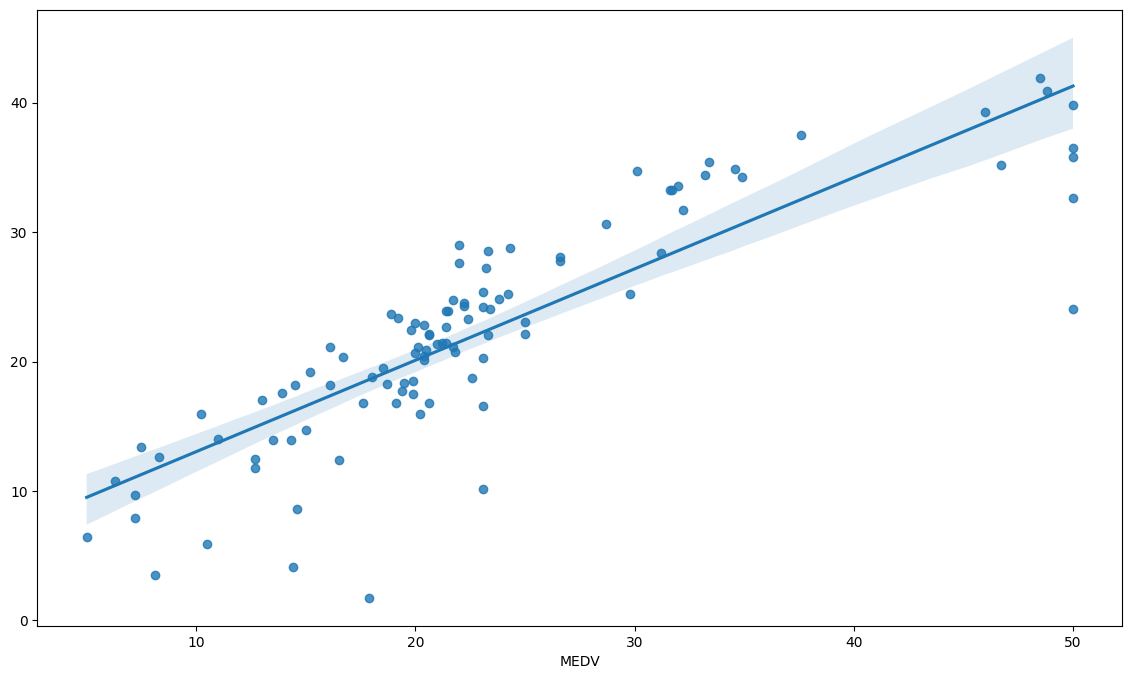

In [32]:
from sklearn.linear_model import LinearRegression
model(LinearRegression(), X_train, y_train, X_test, y_test, 'Linear Regression')

accuracy : 
1.0
Model results
MAE: 2.92
MSE: 18.57
RMSE: 1.71
R2_score: 0.82
--------------------
     Test  Predict
355  20.6     18.2
203  48.5     50.0
16   23.1     18.2
416   7.5      9.5
347  23.1     22.5
501  22.4     28.4
46   20.0     17.4
75   21.4     24.1
31   14.5     21.0
449  13.0     17.8


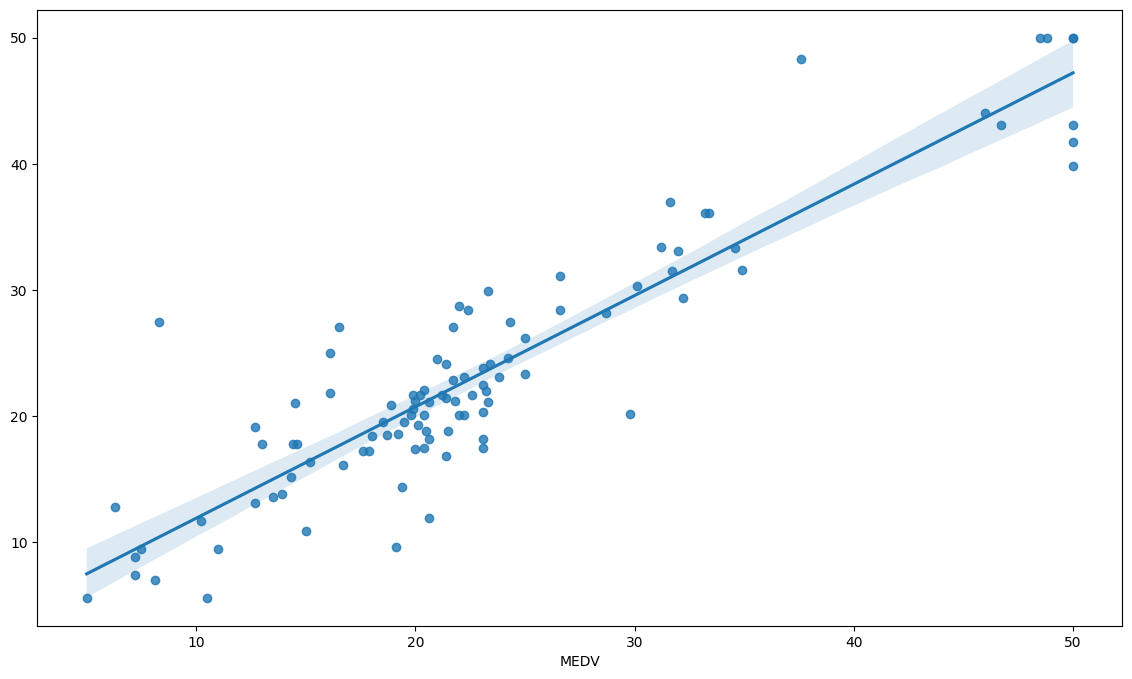

In [33]:
from sklearn.tree import DecisionTreeRegressor
model(DecisionTreeRegressor(), X_train, y_train, X_test, y_test, 'Decision Tree')

accuracy : 
0.669512584206325
Model results
MAE: 3.56
MSE: 40.51
RMSE: 1.89
R2_score: -0.1
--------------------
     Test    Predict
355  20.6  20.589979
203  48.5  32.274032
16   23.1  21.300200
416   7.5  12.937310
347  23.1  24.656346
501  22.4  22.622256
46   20.0  20.261546
75   21.4  23.264707
31   14.5  17.401975
449  13.0  14.075858


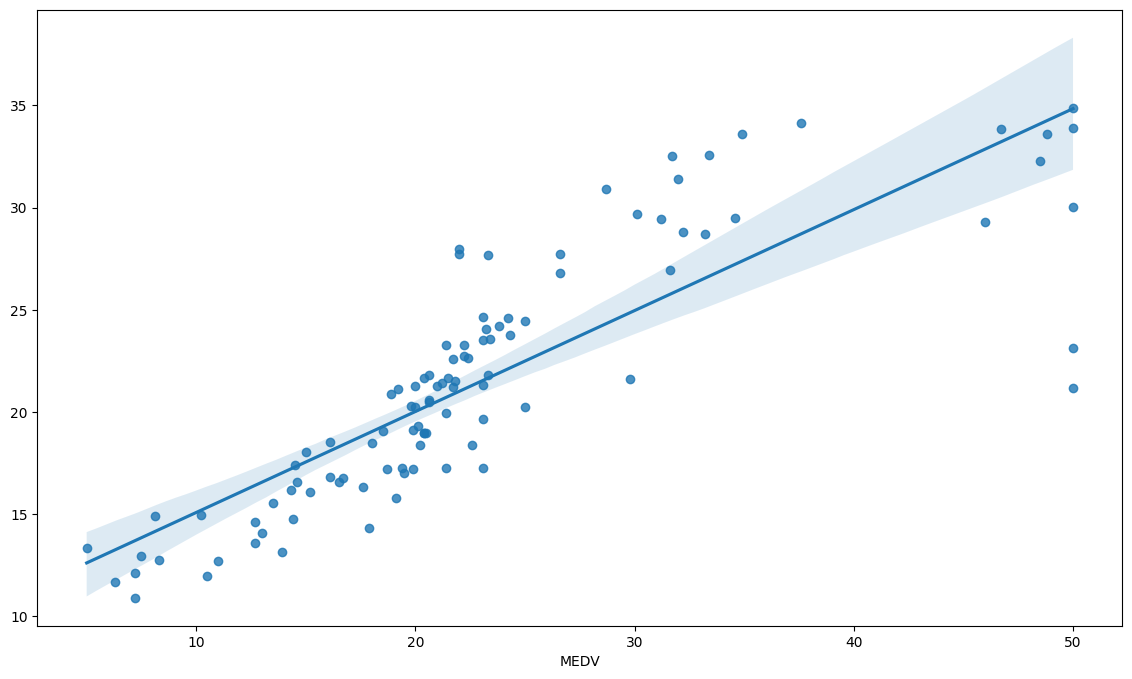

In [34]:
from sklearn.svm import SVR
model(SVR(), X_train, y_train, X_test, y_test, 'Support Vector Regression')

accuracy : 
0.9762203573114824
Model results
MAE: 2.03
MSE: 7.68
RMSE: 1.43
R2_score: 0.91
--------------------
     Test    Predict
355  20.6  22.908876
203  48.5  48.636080
16   23.1  23.432587
416   7.5  10.710391
347  23.1  23.770307
501  22.4  20.729662
46   20.0  21.108718
75   21.4  22.838252
31   14.5  19.467385
449  13.0  15.811806


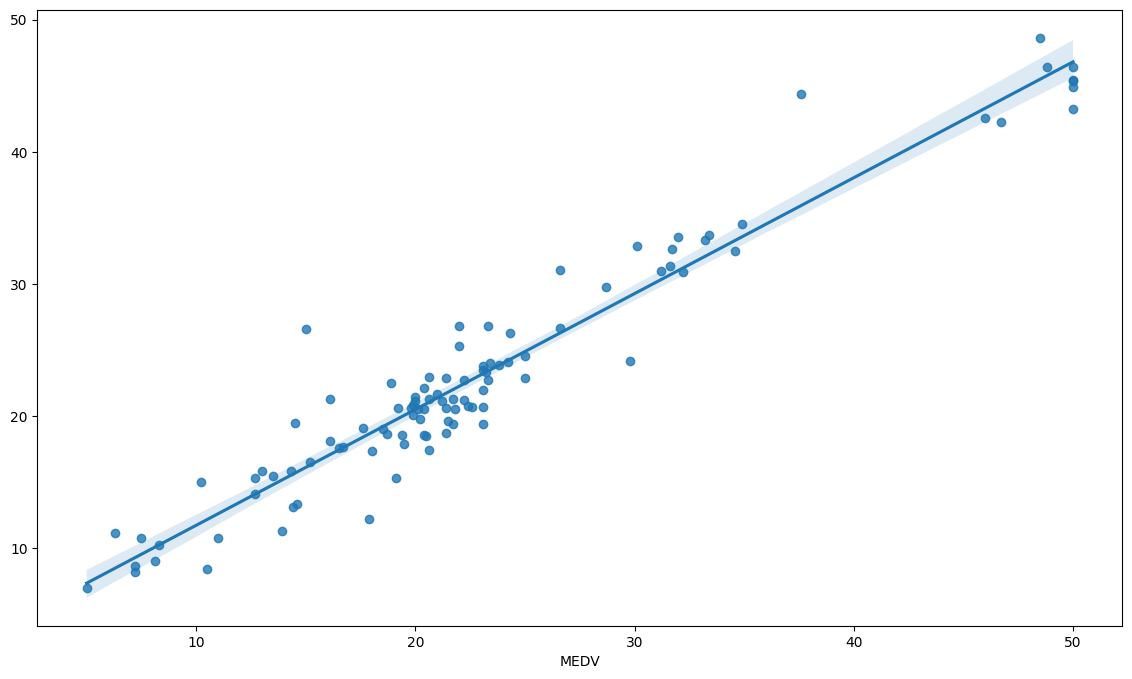

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
model(GradientBoostingRegressor(), X_train, y_train, X_test, y_test, 'Gradient Boosting')

Results DataFrame:
                            MAE    MSE  RMSE  R2_score
Model                                                 
Linear Regression          3.59  30.01  1.89      0.59
Decision Tree              2.92  18.57  1.71      0.82
Support Vector Regression  3.56  40.51  1.89     -0.10
Gradient Boosting          2.03   7.68  1.43      0.91


<Figure size 1200x600 with 0 Axes>

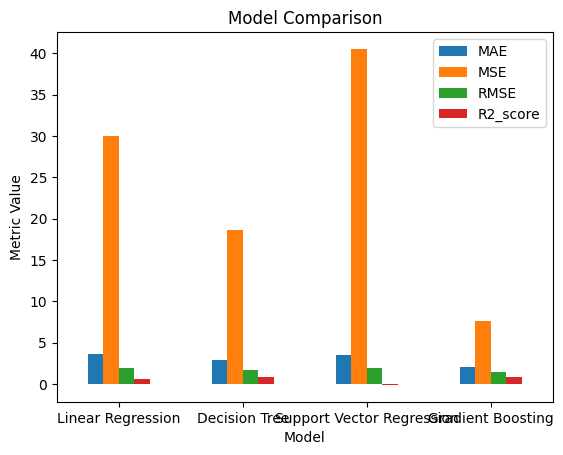

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
# Plot Model Comparison
result_df = pd.DataFrame(results).T
plt.figure(figsize=(12, 6))
result_df.plot(kind='bar', rot=0)
plt.title('Model Comparison')
plt.ylabel('Metric Value')
plt.xlabel('Model')
plt.legend(loc='best')

# Create a DataFrame to display the results
result_df.index.name = 'Model'
print("Results DataFrame:")
print(result_df)